## Using RNNs to classify sentiment on IMDB data

In [1]:
import keras 
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import os
from keras.datasets import imdb
from keras_preprocessing.sequence import pad_sequences
from sklearn.model_selection import KFold
from keras import Sequential
from keras.models import Sequential
from keras.layers import SimpleRNN, LSTM, GRU,  Embedding, Dense
from keras.optimizers import RMSprop
from keras.callbacks import TensorBoard


In [2]:
vocabulary_size = 2000

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=vocabulary_size,seed=113)

In [59]:
print('x_train = {} train sequences'.format(len(x_train)))
print('x_test = {} train sequences'.format(len(x_test)))

x_train = 25000 train sequences
x_test = 25000 train sequences


 Pad (or truncate) the sequences so that they are of the maximum length

In [3]:
max_words = 30

x_train = pad_sequences(x_train, maxlen=max_words)
x_test = pad_sequences(x_test, maxlen=max_words)

In [62]:
print('x_train shape: {}'.format(x_train.shape))
print('x_test shape: {}'.format(x_test.shape))

x_train shape: (25000, 30)
x_test shape: (25000, 30)


In [4]:
model = Sequential()    
model.add(Embedding(input_dim=vocabulary_size, output_dim=50)) # vocab_size is the size of the vocabulary
model.add(SimpleRNN(units=5, kernel_initializer='random_normal', activation='tanh'))
model.add(Dense(units=1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer=RMSprop(learning_rate=0.0001), metrics=['accuracy'])

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 50)          100000    
                                                                 
 simple_rnn (SimpleRNN)      (None, 5)                 280       
                                                                 
 dense (Dense)               (None, 1)                 6         
                                                                 
Total params: 100,286
Trainable params: 100,286
Non-trainable params: 0
_________________________________________________________________


In [13]:
kfold = KFold(n_splits=10, shuffle=True, random_state=42)

for fold, (train_ids, val_ids) in enumerate(kfold.split(x_train, y_train)):
    print(f'Fold {fold+1}')
    x_train_fold, y_train_fold = x_train[train_ids], y_train[train_ids]
    x_val_fold, y_val_fold = x_train[val_ids], y_train[val_ids]

    # Add TensorBoard Callback
    tensorboard_callback = TensorBoard(log_dir=f'logs/fold_{fold+1}')

    # Train model
    history = model.fit(x_train_fold, y_train_fold, epochs=10, batch_size=32, validation_data=(x_val_fold, y_val_fold), callbacks=[tensorboard_callback])

Fold 1
Epoch 1/10
704/704 [==============================] - 25s 26ms/step - loss: 0.6925 - accuracy: 0.5094 - val_loss: 0.6916 - val_accuracy: 0.5296
Epoch 2/10
704/704 [==============================] - 21s 29ms/step - loss: 0.6864 - accuracy: 0.5710 - val_loss: 0.6879 - val_accuracy: 0.5380
Epoch 3/10
704/704 [==============================] - 17s 24ms/step - loss: 0.6753 - accuracy: 0.6056 - val_loss: 0.6828 - val_accuracy: 0.5524
Epoch 4/10
704/704 [==============================] - 17s 25ms/step - loss: 0.6533 - accuracy: 0.6468 - val_loss: 0.6677 - val_accuracy: 0.5932
Epoch 5/10
704/704 [==============================] - 17s 25ms/step - loss: 0.6220 - accuracy: 0.6904 - val_loss: 0.6520 - val_accuracy: 0.6160
Epoch 6/10
704/704 [==============================] - 18s 25ms/step - loss: 0.5919 - accuracy: 0.7207 - val_loss: 0.6373 - val_accuracy: 0.6316
Epoch 7/10
704/704 [==============================] - 18s 26ms/step - loss: 0.5647 - accuracy: 0.7438 - val_loss: 0.6242 - val_ac

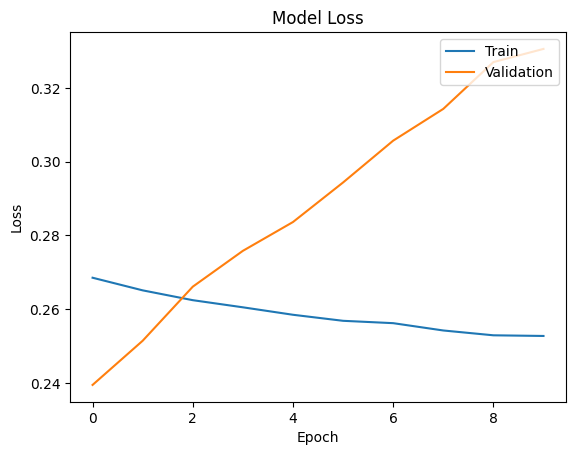

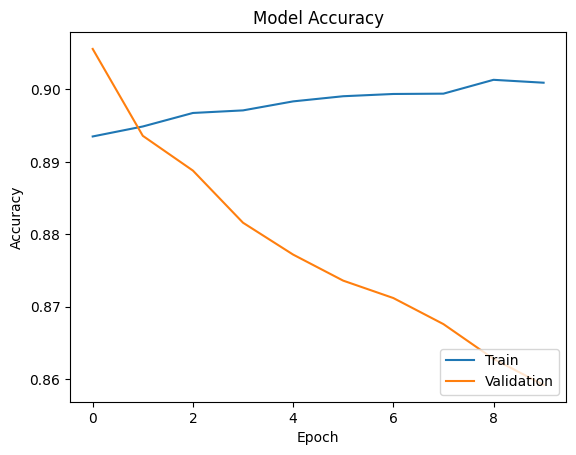

In [14]:
# Plot loss during training
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

# Plot accuracy during training
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()

In [21]:
scores = model.evaluate(x_test, y_test, verbose=0)

print('Model loss: {} and accuracy: {}'.format(scores[0], scores[1]))


Model loss: 0.7305773496627808 and accuracy: 0.7157599925994873


## Tuning The Vanilla RNN Network


Fold 1
Fold 2
Fold 3
Fold 4
Fold 5
Fold 6
Fold 7
Fold 8
Fold 9
Fold 10


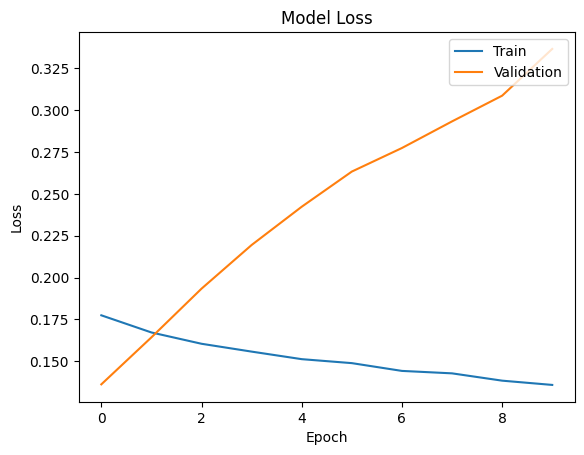

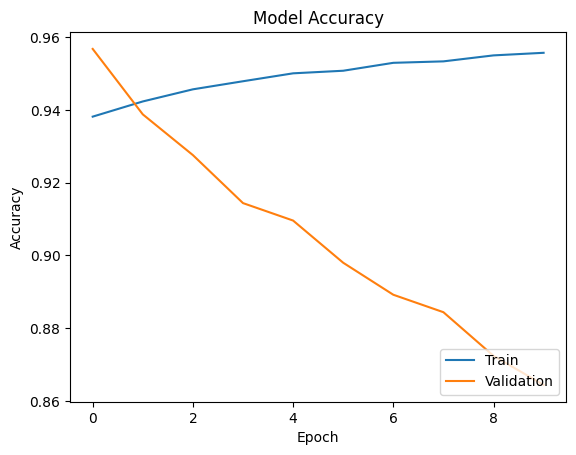

Model loss: 1.4228004217147827 and accuracy: 0.5861600041389465


In [23]:
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=vocabulary_size,seed=113)

max_words = 80

x_train = pad_sequences(x_train, maxlen=max_words)
x_test = pad_sequences(x_test, maxlen=max_words)

model_1 = Sequential()    
model_1.add(Embedding(input_dim=vocabulary_size, output_dim=50)) # vocab_size is the size of the vocabulary
model_1.add(SimpleRNN(units=10, kernel_initializer='random_normal', activation='tanh'))
model_1.add(Dense(units=1, activation='sigmoid'))

model_1.compile(loss='binary_crossentropy', optimizer=RMSprop(learning_rate=0.0001), metrics=['accuracy'])

for fold, (train_ids, val_ids) in enumerate(kfold.split(x_train, y_train)):
    print(f'Fold {fold+1}')
    x_train_fold, y_train_fold = x_train[train_ids], y_train[train_ids]
    x_val_fold, y_val_fold = x_train[val_ids], y_train[val_ids]

    # Add TensorBoard Callback
    tensorboard_callback = TensorBoard(log_dir=f'logs/fold_{fold+1}')

    # Train model
    history_1 = model_1.fit(x_train_fold, y_train_fold, epochs=10, batch_size=32, validation_data=(x_val_fold, y_val_fold), callbacks=[tensorboard_callback], verbose=0)

# Plot loss during training
plt.plot(history_1.history['loss'])
plt.plot(history_1.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

# Plot accuracy during training
plt.plot(history_1.history['accuracy'])
plt.plot(history_1.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()

scores = model_1.evaluate(x_test, y_test, verbose=0)

print('Model loss: {} and accuracy: {}'.format(scores[0], scores[1]))


Increasing the number of hidden units increases the runtime. </br>


## Train LSTM and GRU networks

In [8]:
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=vocabulary_size,seed=113)

max_words = 50

x_train = pad_sequences(x_train, maxlen=max_words)
x_test = pad_sequences(x_test, maxlen=max_words)

In [9]:
# Building a LSTM model 
model_LSTM = Sequential()
model_LSTM.add(Embedding(input_dim=vocabulary_size, output_dim=50))
model_LSTM.add(LSTM(units=64, dropout=0.2, recurrent_dropout=0.2))
model_LSTM.add(Dense(units=1, activation='sigmoid'))

model_LSTM.compile(loss='binary_crossentropy', optimizer=RMSprop(learning_rate=0.0001), metrics=['accuracy'])

model_LSTM.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, None, 50)          100000    
                                                                 
 lstm_1 (LSTM)               (None, 64)                29440     
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 129,505
Trainable params: 129,505
Non-trainable params: 0
_________________________________________________________________


In [10]:
for fold, (train_ids, val_ids) in enumerate(kfold.split(x_train, y_train)):
    print(f'Fold {fold+1}')
    x_train_fold, y_train_fold = x_train[train_ids], y_train[train_ids]
    x_val_fold, y_val_fold = x_train[val_ids], y_train[val_ids]

    # Add TensorBoard Callback
    tensorboard_callback = TensorBoard(log_dir=f'logs/fold_{fold+1}')

    # Train model
    history_LSTM = model_LSTM.fit(x_train_fold, y_train_fold, epochs=10, batch_size=32, validation_data=(x_val_fold, y_val_fold), callbacks=[tensorboard_callback], verbose=0)

# Plot loss during training
plt.plot(history_LSTM.history['loss'])
plt.plot(history_LSTM.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

# Plot accuracy during training
plt.plot(history_LSTM.history['accuracy'])
plt.plot(history_LSTM.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()

scores = history_LSTM.evaluate(x_test, y_test, verbose=0)

print('LSTM Model loss: {} and accuracy: {}'.format(scores[0], scores[1]))

Fold 1


In [28]:
# Building a LSTM model 
model_GRU = Sequential()
model_GRU.add(Embedding(input_dim=vocabulary_size, output_dim=50))
model_GRU.add(GRU(units=64, dropout=0.2, recurrent_dropout=0.2))
model_GRU.add(Dense(units=1, activation='sigmoid'))

model_GRU.compile(loss='binary_crossentropy', optimizer=RMSprop(learning_rate=0.0001), metrics=['accuracy'])

model_GRU.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, None, 50)          100000    
                                                                 
 gru (GRU)                   (None, 64)                22272     
                                                                 
 dense_3 (Dense)             (None, 1)                 65        
                                                                 
Total params: 122,337
Trainable params: 122,337
Non-trainable params: 0
_________________________________________________________________


In [ ]:
for fold, (train_ids, val_ids) in enumerate(kfold.split(x_train, y_train)):
    print(f'Fold {fold+1}')
    x_train_fold, y_train_fold = x_train[train_ids], y_train[train_ids]
    x_val_fold, y_val_fold = x_train[val_ids], y_train[val_ids]

    # Add TensorBoard Callback
    tensorboard_callback = TensorBoard(log_dir=f'logs/fold_{fold+1}')

    # Train model
    history_GRU = model_LSTM.fit(x_train_fold, y_train_fold, epochs=10, batch_size=32, validation_data=(x_val_fold, y_val_fold), callbacks=[tensorboard_callback], verbose=0)


# Plot loss during training
plt.plot(history_GRU.history['loss'])
plt.plot(history_GRU.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

# Plot accuracy during training
plt.plot(history_GRU.history['accuracy'])
plt.plot(history_GRU.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()

scores = history_GRU.evaluate(x_test, y_test, verbose=0)

print('GRU Model loss: {} and accuracy: {}'.format(scores[0], scores[1]))